### HELP International -NGO - Investment Focus 

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

<B>Objetitve</B>:
1. Categorise the countries using some socio-economic and health factors that determine the overall development of the country.
2. Suggest the countries which the CEO needs to focus on the most.  


In [8]:
#Importing Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale the data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Data Reading

In [2]:
#reading Dataset
countrydata = pd.read_csv(r"D:\OneDrive - Infosys Limited\UG\PCA\Assignment\Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Inspection

In [3]:
countrydata.shape
## about 167 records present with 10 attributes.

(167, 10)

In [4]:
countrydata.describe()
### Inspecting the numerical attributes of the data.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
countrydata.isnull().any()
### Check for presence of any null values
### No nulls seen.

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

### Scaling of numerical data

In [7]:
### Create dataframe containing only numerical attributes for further analysis
countrydata_num = countrydata[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [9]:
### Scaling of data using StandardSacler

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_norm = standard_scaler.fit_transform(countrydata_num)

In [13]:
### Convert the saceled numerical array back to dataframe and set columns.
country_norm=pd.DataFrame(country_norm)
country_norm.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_norm.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


### Prinicipal Component Analysis 

In [14]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [15]:
#Doing the PCA onthe numerical dataset
pca.fit(country_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [17]:
### Dataframe containing PC values - PC1 & 2  along with feature names.
colnames = list(country_norm.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


#### Selection of number of PCA components - Scree Plot

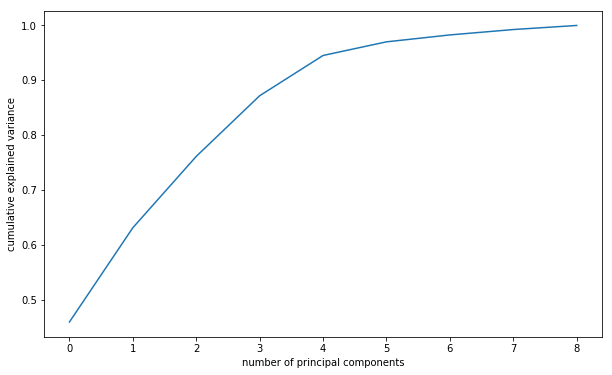

In [20]:
#Making the screeplot - plotting the cumulative variance against the number of components

plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance')
plt.show()

### > 90% variance can be captured by 5 principal components.

#### Data transform to 5 PCA components

In [21]:
### Using incremental PCA for efficiency 
### Fit transform for 5 PC components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [23]:
## Fit the numerical data for pca transformation into 5 components
country_reduced=pca_final.fit_transform(country_norm)

In [24]:
### Inspect one of the PC components
pca_final.components_[0]

array([-0.41967749,  0.28371974,  0.15090765,  0.16157087,  0.39861811,
       -0.1928264 ,  0.42549267, -0.40396116,  0.39266855])

In [27]:
### Create dataframe have PC vlaues with the features after final transformation.

colnames = list(country_norm.columns)
pcs_final_df = pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1], 'PC3':pca_final.components_[2],'PC4':pca_final.components_[3],'PC5':pca_final.components_[4],'Feature':colnames})
pcs_final_df

,PC1,PC2,PC3,PC4,PC5,Feature
0,-0.419677,0.193122,-0.034361,0.371073,-0.183901,child_mort
1,0.283720,0.613580,0.146870,0.004906,0.070439,exports
2,0.150908,-0.243503,-0.604453,0.454329,0.515747,health
3,0.161571,0.671309,-0.309139,-0.077217,0.242221,imports
4,0.398618,0.024074,0.300028,0.394266,-0.250698,income
5,-0.192826,-0.003326,0.629844,0.149208,0.717691,inflation
6,0.425493,-0.224559,0.120471,-0.199968,0.139809,life_expec
7,-0.403961,0.152200,0.027959,0.383224,-0.085758,total_fer
8,0.392669,-0.045737,0.119599,0.534179,-0.178110,gdpp


#### Correlation amongst PCA components 

In [28]:
### creating correlation matrix for the principal components
corrmat = np.corrcoef(country_reduced.transpose())

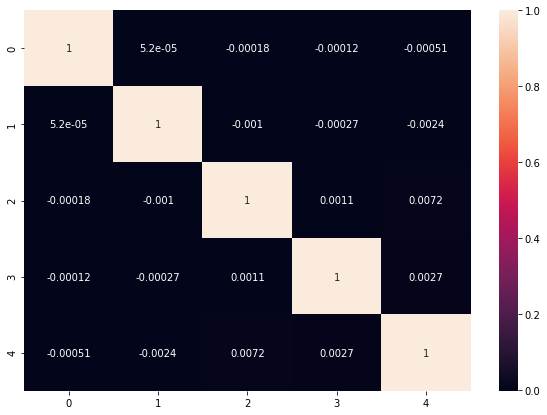

In [30]:
#plotting the correlation matrix
plt.figure(figsize = (10,7))
sns.heatmap(corrmat,annot = True)

In [31]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# Correlations are close to 0 . 

max corr: 0.007194543060491322 , min corr:  -0.002374704497495323


### Outlier Treatment

In [32]:
countryname=pd.Series(countrydata.country)

## Creation of dataframe including PCA components and country

country_reduced=pd.DataFrame(country_reduced)
country_reduced=pd.concat([country_reduced, countryname], axis=1)
country_reduced.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','country']
country_reduced.head(5)


,PC1,PC2,PC3,PC4,PC5,country
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda


In [34]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_reduced.describe(percentiles=[.25,.5,.75,.90,.95,.99])
### there are outliers seen - difference between 99% and max is not gradual increase.

,PC1,PC2,PC3,PC4,PC5
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-1.063687e-17,-2.991619e-17,1.728491e-17,2.260334e-17,-8.974857e-17
std,2.039747e+00,1.247247e+00,1.084958e+00,1.000370e+00,8.142544e-01
min,-4.909489e+00,-2.998696e+00,-2.742965e+00,-1.591559e+00,-2.815243e+00
25%,-1.382257e+00,-7.512665e-01,-5.293363e-01,-7.853547e-01,-3.969344e-01
50%,2.289034e-02,-9.336691e-02,-2.342960e-01,-3.079123e-01,-7.037759e-02
75%,1.224237e+00,5.505069e-01,4.136567e-01,7.264802e-01,2.825802e-01
90%,2.462777e+00,1.286492e+00,1.294047e+00,1.222214e+00,8.204424e-01
95%,3.103822e+00,1.718057e+00,1.799184e+00,1.780687e+00,1.110188e+00
99%,4.766517e+00,4.795525e+00,3.272137e+00,2.787454e+00,2.150525e+00


In [35]:
country_reduced.shape
### Data size before outlier treatment is 167 records with 6 attributes ( including Country name)

(167, 6)

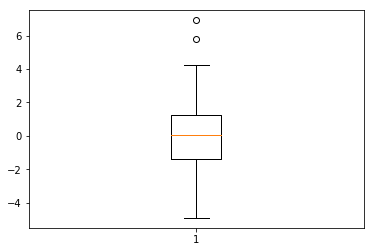

In [36]:
# outlier treatment for PC1

plt.boxplot(country_reduced.PC1)
Q1 = country_reduced.PC1.quantile(0.25)
Q3 = country_reduced.PC1.quantile(0.75)
IQR = Q3 - Q1
country_reduced = country_reduced[(country_reduced.PC1 >= Q1 - 1.5*IQR) & (country_reduced.PC1 <= Q3 + 1.5*IQR)]

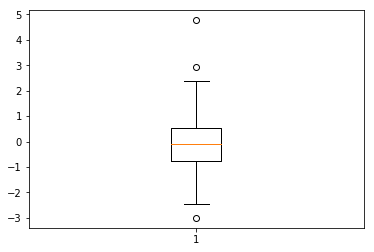

In [37]:
# outlier treatment for PC2
plt.boxplot(country_reduced.PC2)
Q1 = country_reduced.PC2.quantile(0.25)
Q3 = country_reduced.PC2.quantile(0.75)
IQR = Q3 - Q1
country_reduced = country_reduced[(country_reduced.PC2 >= Q1 - 1.5*IQR) & (country_reduced.PC2 <= Q3 + 1.5*IQR)]

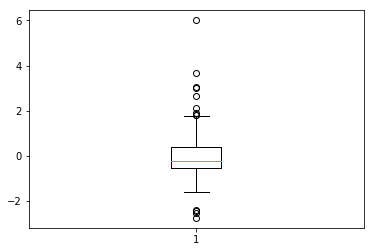

In [38]:
# outlier treatment for PC3
plt.boxplot(country_reduced.PC3)
Q1 = country_reduced.PC3.quantile(0.25)
Q3 = country_reduced.PC3.quantile(0.75)
IQR = Q3 - Q1
country_reduced = country_reduced[(country_reduced.PC3 >= Q1 - 1.5*IQR) & (country_reduced.PC3 <= Q3 + 1.5*IQR)]

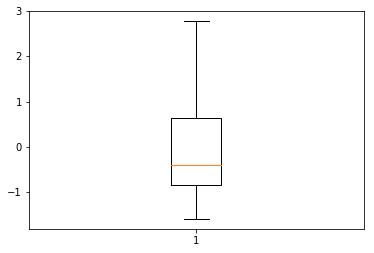

In [39]:
# outlier treatment for PC4
plt.boxplot(country_reduced.PC4)
Q1 = country_reduced.PC4.quantile(0.25)
Q3 = country_reduced.PC4.quantile(0.75)
IQR = Q3 - Q1
country_reduced = country_reduced[(country_reduced.PC4 >= Q1 - 1.5*IQR) & (country_reduced.PC4 <= Q3 + 1.5*IQR)]

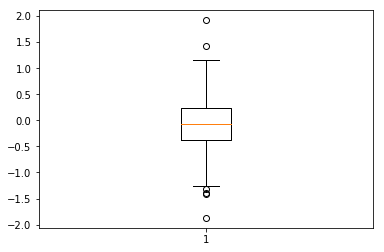

In [40]:
# outlier treatment for PC5
plt.boxplot(country_reduced.PC5)
Q1 = country_reduced.PC5.quantile(0.25)
Q3 = country_reduced.PC5.quantile(0.75)
IQR = Q3 - Q1
country_reduced = country_reduced[(country_reduced.PC5 >= Q1 - 1.5*IQR) & (country_reduced.PC5 <= Q3 + 1.5*IQR)]

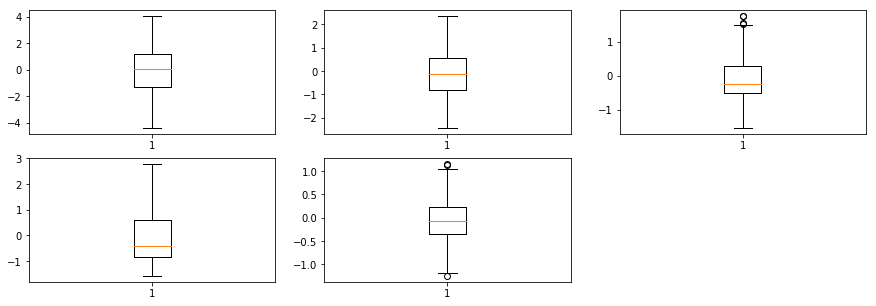

In [41]:
plt.figure(figsize = (15, 5))
plt.subplot(2,3,1)
plt.boxplot(country_reduced.PC1)
plt.subplot(2,3,2)
plt.boxplot(country_reduced.PC2)
plt.subplot(2,3,3)
plt.boxplot(country_reduced.PC3)
plt.subplot(2,3,4)
plt.boxplot(country_reduced.PC4)
plt.subplot(2,3,5)
plt.boxplot(country_reduced.PC5)
plt.show()

In [43]:
country_reduced.shape
### Data set after outlier treatment - 143 records with 6 attributes.
### ~14% data is outlier .

(143, 6)

In [52]:
### Defining Dataframes for later processing .

country_afteroutliers_countryout=country_reduced[['PC1','PC2','PC3','PC4','PC5']] ## DF without countryname and without outlier treatment
country_norm_with_country=pd.concat([country_norm, countryname], axis=1) ## DF with countryname and withour outlier treatment

### Data with country and without PCA components after outlier treatment
country_norm_after_outlierremoval = pd.merge(country_norm_with_country, country_reduced, how='inner', on=['country'])
country_norm_after_outlierremoval_withcountry=country_norm_after_outlierremoval.drop(['PC1', 'PC2','PC3','PC4','PC5'], axis=1)

### Data without country and PCA components after outlier treatment
country_norm_after_outlierremoval.drop(['country','PC1', 'PC2','PC3','PC4','PC5'], axis=1, inplace=True)


In [56]:
### Fit Transform the data after outlier removal.
country_reduced=pca_final.fit_transform(country_norm_after_outlierremoval)
pca_final.components_[0]
colnames = list(country_norm_after_outlierremoval.columns)
pcs_final_df = pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1], 'PC3':pca_final.components_[2],'PC4':pca_final.components_[3],'PC5':pca_final.components_[4],'Feature':colnames})
pcs_final_df

,PC1,PC2,PC3,PC4,PC5,Feature
0,-0.468255,0.300526,0.210701,-0.082143,-0.211522,child_mort
1,0.127434,-0.296679,0.614424,-0.261863,0.251514,exports
2,0.243362,0.596150,0.156681,0.573423,0.457176,health
3,0.036288,-0.309961,0.627249,0.321139,-0.041341,imports
4,0.319397,0.231760,0.158843,-0.355181,-0.079368,income
5,-0.165908,-0.045195,-0.113747,-0.395269,0.761721,inflation
6,0.478189,-0.123692,-0.206725,-0.089909,0.123103,life_expec
7,-0.460923,0.309024,0.189366,-0.183330,0.118125,total_fer
8,0.365104,0.451270,0.208167,-0.410671,-0.256230,gdpp


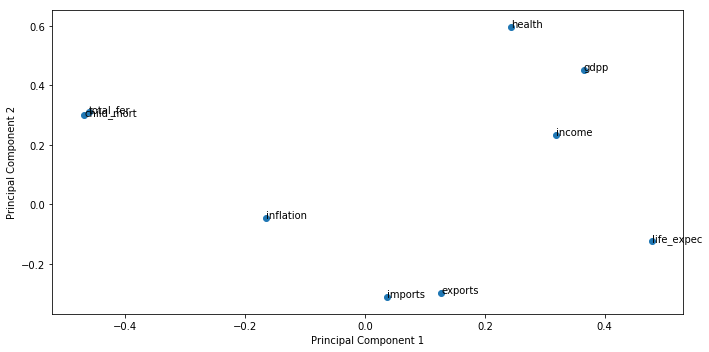

In [57]:
### Plotting of PC1 and PC2 for features 
fig = plt.figure(figsize = (10,5))
plt.scatter(pcs_final_df.PC1, pcs_final_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_final_df.Feature):
    plt.annotate(txt, (pcs_final_df.PC1[i],pcs_final_df.PC2[i]))
plt.tight_layout()
plt.show()

<B>Life Expectancy</B> and <B>child mortality</B> are top 2 components having higher variance with first component.

In [58]:
country_reduced=pd.DataFrame(country_reduced)
country_reduced.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
country_reduced.head(5)

,PC1,PC2,PC3,PC4,PC5
0,-2.840530,1.212760,0.117346,0.515680,0.011387
1,0.658917,-0.729772,-0.655794,0.582241,-0.103071
2,-0.148468,-0.813648,-0.894686,-0.917730,0.489998
3,-3.322142,-0.058810,1.002697,-1.774372,0.513003
4,1.025975,-0.797065,0.192195,0.154894,-0.340844


### Hopkins Score calculation

In [59]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [60]:
hopkins(country_reduced)
## High tendency to cluster

0.712571070171076

### K Means Clustering

In [61]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(country_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [63]:
unique, counts = np.unique(model_clus5.labels_, return_counts=True)
dict(zip(unique, counts))

### Getting count of countries per cluster

{0: 24, 1: 22, 2: 37, 3: 20, 4: 40}

In [64]:
### analysis of clusters formed
pca_km = pd.concat([country_reduced, pd.Series(model_clus5.labels_),country_norm_after_outlierremoval_withcountry], axis=1)
pca_km.columns = ['PC1','PC2', 'PC3', 'PC4','PC5', 'ClusterID','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','country']
pca_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.840530,1.212760,0.117346,0.515680,0.011387,3,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.658917,-0.729772,-0.655794,0.582241,-0.103071,2,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.148468,-0.813648,-0.894686,-0.917730,0.489998,2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,-3.322142,-0.058810,1.002697,-1.774372,0.513003,3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,1.025975,-0.797065,0.192195,0.154894,-0.340844,4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda


In [65]:
# analysis of clusters formed - getting the mean values per attribute per Cluster.

km_clusters_child_mort = pd.DataFrame(pca_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(pca_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(pca_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(pca_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(pca_km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(pca_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(pca_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(pca_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(pca_km.groupby(["ClusterID"]).gdpp.mean())


In [66]:
### Creation dataframe of the mean values

df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "Child Mort mean", "Exports mean", "Health mean","imports mean",'income mean','inflation mean','life_expec mean','total_fer mean','gdpp mean']
df

,ClusterID,Child Mort mean,Exports mean,Health mean,imports mean,income mean,inflation mean,life_expec mean,total_fer mean,gdpp mean
0,0,0.649040,-0.095935,-0.576732,-0.105069,-0.560157,0.274876,-0.797179,0.800004,-0.541151
1,1,-0.848363,0.033268,1.227648,-0.315782,1.181322,-0.611224,1.176926,-0.756976,1.768530
2,2,-0.331850,-0.494215,-0.438382,-0.541882,-0.338837,0.083328,0.256475,-0.348552,-0.417589
3,3,1.819039,-0.533592,0.084646,-0.261019,-0.802691,0.160894,-1.640521,1.780310,-0.667474
4,4,-0.624255,0.459426,0.071227,0.524911,-0.030551,-0.345218,0.483766,-0.689365,-0.162646


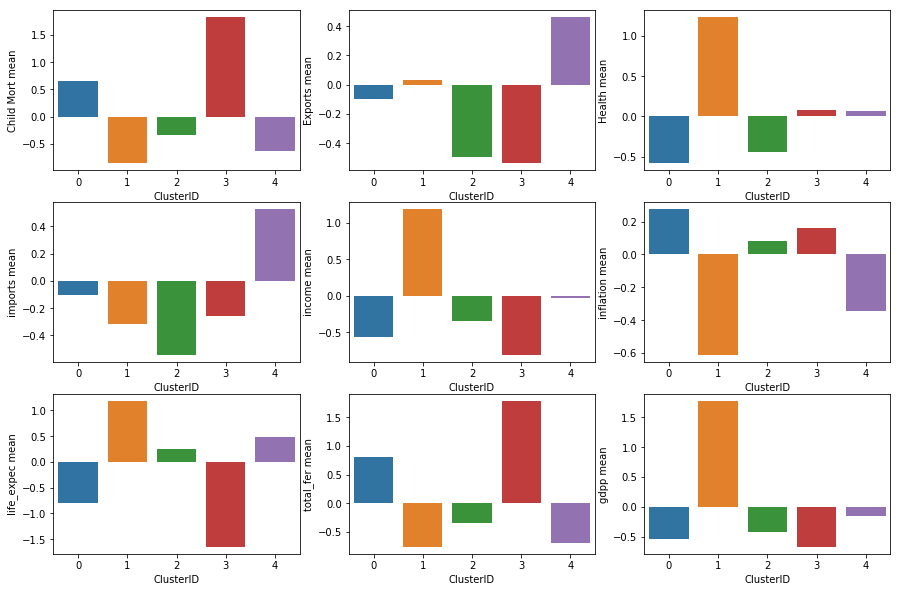

In [67]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df['Child Mort mean'])
plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df['Exports mean'])
plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df['Health mean'])
plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df['imports mean'])
plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df['income mean'])
plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df['inflation mean'])
plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df['life_expec mean'])
plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df['total_fer mean'])
plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df['gdpp mean'])
plt.show()

Two clusters with low life expectancy and child mortality :

1. Cluster # 3 
2. Cluster # 0 

#### Silhouette Score Analysis

In [68]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_reduced)
    sse_.append([k, silhouette_score(country_reduced, kmeans.labels_)])

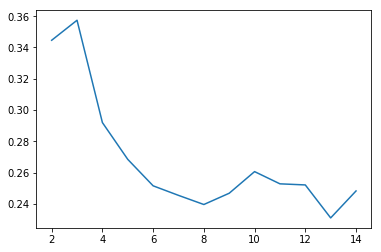

In [70]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Beyond 5 clsuters doesnt seem preferable as the elements within cluster can be dissimilar.

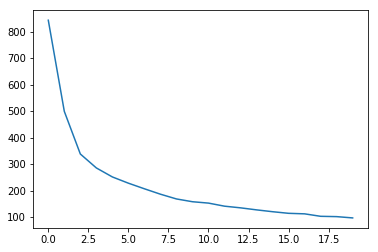

In [72]:
# sum of squared distances  - Elbow Method
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_reduced)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### 5 clsuters seem optimal

#### KMeans with 6 Clusters

In [75]:
# Kmeans with K=6
model_clus6 = KMeans(n_clusters = 6, max_iter=50)
model_clus6.fit(country_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
unique, counts = np.unique(model_clus6.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 20, 1: 34, 2: 22, 3: 19, 4: 32, 5: 16}

In [86]:
pca_km_6 = pd.concat([country_reduced, pd.Series(model_clus6.labels_), country_norm_after_outlierremoval_withcountry], axis=1)
#pca_km_6.drop(['child_mort','exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp'], axis=1,inplace=True)
pca_km_6.columns = ['PC1','PC2', 'PC3', 'PC4','PC5', 'ClusterID','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','country']
pca_km_6.head(2)

,PC1,PC2,PC3,PC4,PC5,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-2.840530,1.212760,0.117346,0.515680,0.011387,0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,0.658917,-0.729772,-0.655794,0.582241,-0.103071,1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania


In [87]:
# analysis of clusters formed - Cluster 6 
km_clusters_child_mort6 = pd.DataFrame(pca_km_6.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports6 = pd.DataFrame(pca_km_6.groupby(["ClusterID"]).exports.mean())
km_clusters_health6 = pd.DataFrame(pca_km_6.groupby(["ClusterID"]).health.mean())
km_clusters_imports6 = pd.DataFrame(pca_km_6.groupby(["ClusterID"]).imports.mean())
km_clusters_income6 = pd.DataFrame(pca_km_6.groupby(["ClusterID"]).income.mean())
km_clusters_inflation6 = pd.DataFrame(pca_km_6.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec6 = pd.DataFrame(pca_km_6.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer6 = pd.DataFrame(pca_km_6.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp6 = pd.DataFrame(pca_km_6.groupby(["ClusterID"]).gdpp.mean())

In [88]:
df6 = pd.concat([pd.Series([0,1,2,3,4,5]), km_clusters_child_mort6, km_clusters_exports6, km_clusters_health6,km_clusters_imports6,km_clusters_income6,km_clusters_inflation6,km_clusters_life_expec6,km_clusters_total_fer6,km_clusters_gdpp6], axis=1)
df6.columns = ["ClusterID", "Child Mort mean", "Exports mean", "Health mean","imports mean",'income mean','inflation mean','life_expec mean','total_fer mean','gdpp mean']
df6

,ClusterID,Child Mort mean,Exports mean,Health mean,imports mean,income mean,inflation mean,life_expec mean,total_fer mean,gdpp mean
0,0,1.770915,-0.604028,0.136497,-0.261433,-0.813721,0.075023,-1.610069,1.765402,-0.675595
1,1,-0.323086,-0.485061,-0.425329,-0.631770,-0.314832,0.139353,0.271699,-0.419763,-0.408431
2,2,-0.848363,0.033268,1.227648,-0.315782,1.181322,-0.611224,1.176926,-0.756976,1.768530
3,3,-0.084732,0.175882,-0.275171,0.597000,-0.561220,-0.209946,-0.371345,0.097245,-0.531839
4,4,-0.714365,0.450759,0.168402,0.425065,0.101033,-0.406216,0.599933,-0.825810,-0.064100
5,5,0.921581,-0.129789,-0.871819,-0.314464,-0.552981,0.614922,-0.767573,1.117340,-0.546192


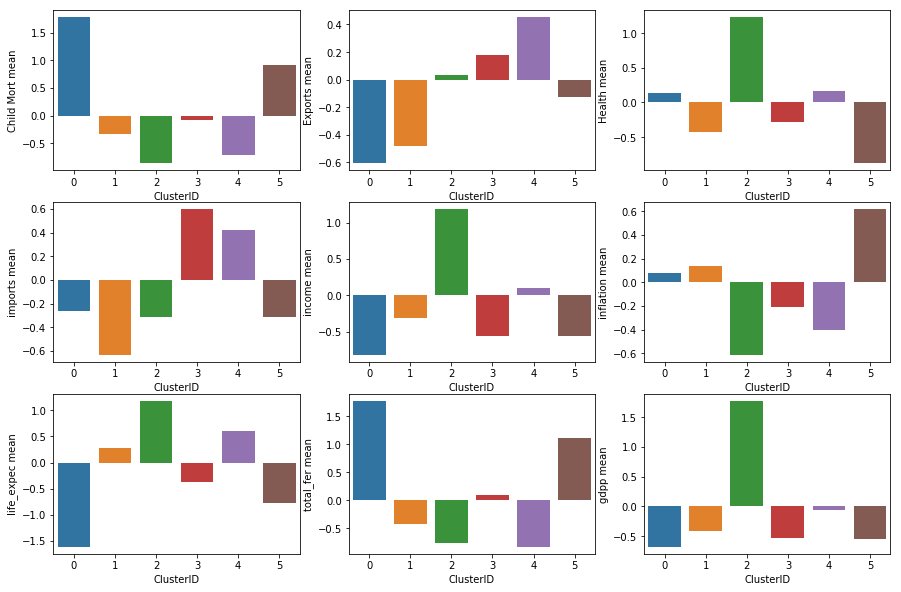

In [90]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.barplot(x=df6.ClusterID, y=df6['Child Mort mean'])
plt.subplot(3,3,2)
sns.barplot(x=df6.ClusterID, y=df6['Exports mean'])
plt.subplot(3,3,3)
sns.barplot(x=df6.ClusterID, y=df6['Health mean'])
plt.subplot(3,3,4)
sns.barplot(x=df6.ClusterID, y=df6['imports mean'])
plt.subplot(3,3,5)
sns.barplot(x=df6.ClusterID, y=df6['income mean'])
plt.subplot(3,3,6)
sns.barplot(x=df6.ClusterID, y=df6['inflation mean'])
plt.subplot(3,3,7)
sns.barplot(x=df6.ClusterID, y=df6['life_expec mean'])
plt.subplot(3,3,8)
sns.barplot(x=df6.ClusterID, y=df6['total_fer mean'])
plt.subplot(3,3,9)
sns.barplot(x=df6.ClusterID, y=df6['gdpp mean'])
plt.show()

Two clusters with low life expectancy and child mortality :

1. Cluster # 0 
2. Cluster # 5

#### Analysis of Clusters identified above 2 iterations

#### K Components = 5

In [94]:
## Countries belonging to Cluster #3 
cl3_country_km5=pca_km.loc[(pca_km.ClusterID==3)]
mean_cl3_life_expec_km5=cl3_country_km5.life_expec.mean()
mean_cl3_child_mort_km5=cl3_country_km5.child_mort.mean()
cl3_country_km5.country.unique()

array(['Afghanistan', 'Angola', 'Burkina Faso', 'Burundi', 'Chad',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda',
       'Sierra Leone', 'Tanzania', 'Togo', 'Uganda', 'Zambia'],
      dtype=object)

In [95]:
## Countries belonging to Cluster # 0
cl0_country_km5=pca_km.loc[(pca_km.ClusterID==0)]
mean_cl0_life_expec_km5=cl0_country_km5.life_expec.mean()
mean_cl0_child_mort_km5=cl0_country_km5.child_mort.mean()
cl0_country_km5.country.unique()

array(['Botswana', 'Cambodia', 'Comoros', 'Congo, Rep.',
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Iraq',
       'Kenya', 'Lao', 'Madagascar', 'Mauritania', 'Namibia', 'Pakistan',
       'Senegal', 'Solomon Islands', 'South Africa', 'Sudan',
       'Tajikistan', 'Turkmenistan', 'Vanuatu', 'Yemen'], dtype=object)

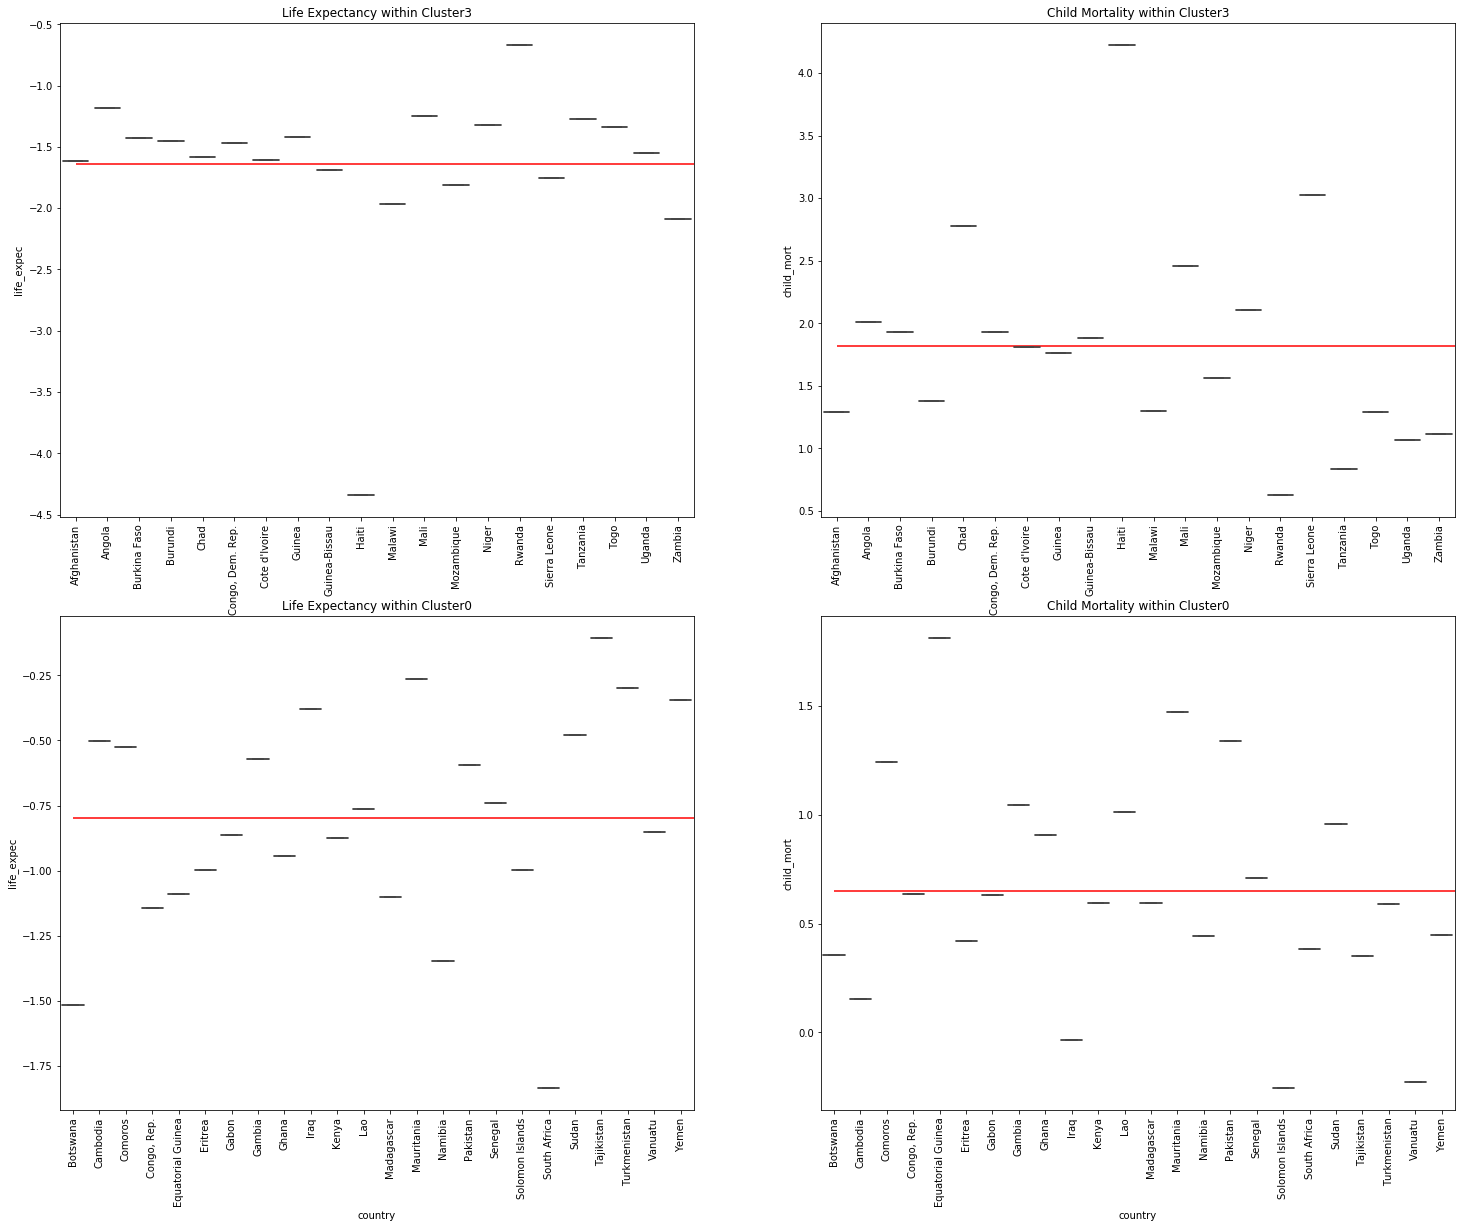

In [106]:
### analysis of Cluster 3 & 0 for life expectancy & Child Mortality - Top variable 

plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.boxplot(x='country', y='life_expec', data=cl3_country_km5 )
plt.hlines(mean_cl3_life_expec_km5, 0,len(cl3_country_km5.country.unique()),color='red', linestyle='-')
plt.title("Life Expectancy within Cluster3")
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.boxplot(x='country', y='child_mort', data=cl3_country_km5 )
plt.hlines(mean_cl3_child_mort_km5, 0,len(cl3_country_km5.country.unique()),color='red', linestyle='-')
plt.title("Child Mortality within Cluster3")
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.boxplot(x='country', y='life_expec', data=cl0_country_km5 )
plt.hlines(mean_cl0_life_expec_km5, 0,len(cl0_country_km5.country.unique()),color='red', linestyle='-')
plt.title("Life Expectancy within Cluster0")
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.boxplot(x='country', y='child_mort', data=cl0_country_km5 )
plt.hlines(mean_cl0_child_mort_km5, 0,len(cl0_country_km5.country.unique()),color='red', linestyle='-')
plt.title("Child Mortality within Cluster0")
plt.xticks(rotation=90)
plt.show()

## Countries which are below the mean for life expectancy  - Cluster 3 
# Guinea-Bissau, Haiti, Malawi, Mozambique, Sierra Leone, Zambia

## Countries which are below the mean for Child mortality  - Cluster 3
# Afghanistan, Burundi, Guinea, Malawi, Mozambique, Rwanda, Tanzania, Togo, Uganda, Zambia

## Countries which are below the mean for life expectancy - Clusetr 0 
# Botswana, Congo, Wquatorial Guinea, Eritrea, Gabon, Ghana, Kenya, Madagascar, Namibia, Solomon Islands, South Africa, Vanuatu

## Countries which are below the mean for Child mortality  - Cluster 0
#Botswana, Cambodia,Eritrea,Gabon,Iraq, Kenya, Madagascar, Namibia, Solomon Islanda, South Africa, Tajikistan, Turkmenistan, Vanuatu, Yemen


#### K Components = 6

In [108]:
## Countries belonging to Cluster #0 
cl0_country_km6=pca_km_6.loc[(pca_km_6.ClusterID==0)]
mean_cl0_life_expec_km6=cl0_country_km6.life_expec.mean()
mean_cl0_child_mort_km6=cl0_country_km6.child_mort.mean()
cl0_country_km6.country.unique()

array(['Afghanistan', 'Burkina Faso', 'Burundi', 'Chad',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Gambia', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger',
       'Rwanda', 'Sierra Leone', 'Tanzania', 'Togo', 'Uganda', 'Zambia'],
      dtype=object)

In [109]:
## Countries belonging to Cluster # 5
cl5_country_km6=pca_km_6.loc[(pca_km_6.ClusterID==5)]
mean_cl5_life_expec_km6=cl5_country_km6.life_expec.mean()
mean_cl5_child_mort_km6=cl5_country_km6.child_mort.mean()
cl5_country_km6.country.unique()

array(['Angola', 'Comoros', 'Congo, Rep.', 'Equatorial Guinea', 'Eritrea',
       'Gabon', 'Ghana', 'Iraq', 'Kenya', 'Lao', 'Madagascar',
       'Mauritania', 'Pakistan', 'Senegal', 'Sudan', 'Yemen'],
      dtype=object)

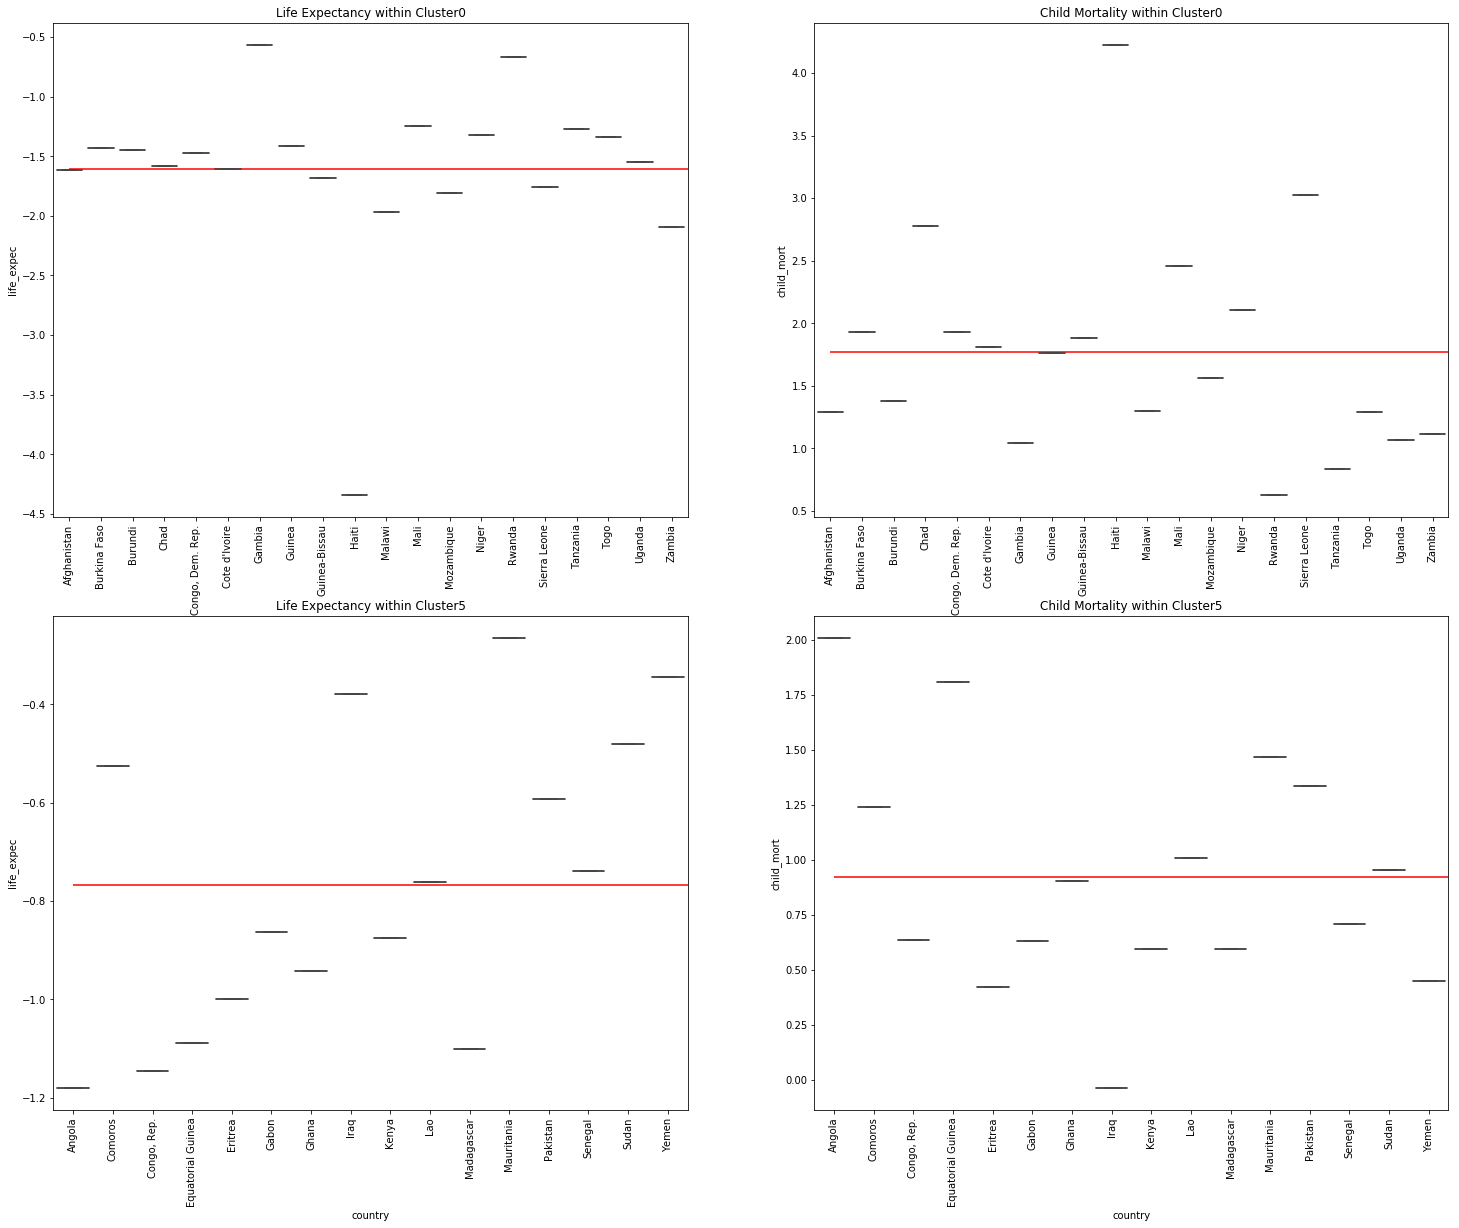

In [110]:
### analysis of Cluster 0 & 5 for life expectancy & Child Mortality - Top variable 

plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.boxplot(x='country', y='life_expec', data=cl0_country_km6 )
plt.hlines(mean_cl0_life_expec_km6, 0,len(cl0_country_km6.country.unique()),color='red', linestyle='-')
plt.title("Life Expectancy within Cluster0")
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.boxplot(x='country', y='child_mort', data=cl0_country_km6 )
plt.hlines(mean_cl0_child_mort_km6, 0,len(cl0_country_km6.country.unique()),color='red', linestyle='-')
plt.title("Child Mortality within Cluster0")
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.boxplot(x='country', y='life_expec', data=cl5_country_km6 )
plt.hlines(mean_cl5_life_expec_km6, 0,len(cl0_country_km5.country.unique()),color='red', linestyle='-')
plt.title("Life Expectancy within Cluster5")
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.boxplot(x='country', y='child_mort', data=cl5_country_km6 )
plt.hlines(mean_cl5_child_mort_km6, 0,len(cl5_country_km6.country.unique()),color='red', linestyle='-')
plt.title("Child Mortality within Cluster5")
plt.xticks(rotation=90)
plt.show()

## Countries which are below the mean for life expectancy  - Cluster 0 
# Guinea-Bissau, Haiti, Malawi, Mozambique, Sierra Leone, Zambia

## Countries which are below the mean for Child mortality  - Cluster 0
# Afghanistan, Burundi, Gambia, Guinea-Bissau, Malawi, Mozambique, Rwanda, Tanzania, Togo, Uganda, Zambia

## Countries which are below the mean for life expectancy - Clusetr 5 
# Angola, Congo, Equatorial Guinea, Eritrea, Gabon, Ghana, Kenya, Madagascar

## Countries which are below the mean for Child mortality  - Cluster 5
# Angola, Congo, Eritrea,Gabon,Iraq, Kenya, Madagascar, Senegal, Yemen


In [114]:
print("Life Expec - K6 - Cl0",mean_cl0_life_expec_km6)
print("Life Expec - K6 - Cl5",mean_cl5_life_expec_km6)
print("Life Expec - K5 - Cl3",mean_cl3_life_expec_km5)
print("Life Expec - K5 - Cl0",mean_cl0_life_expec_km5)

### Lowest mean of Life expectancy is -1.6405209865421244

Life Expec - K6 - Cl0 -1.610069305782682
Life Expec - K6 - Cl5 -0.7675728047714413
Life Expec - K5 - Cl3 -1.6405209865421244
Life Expec - K5 - Cl0 -0.7971786055097883


In [119]:
#Countries less than the mean calcualted above for life expectancy 
life_expec_belowmean=country_norm_with_country.loc[(country_norm_with_country.life_expec < -1.6405209865421244)]
life_expec_belowmean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
31,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035,Central African Republic
64,1.883454,-0.958988,0.615026,-0.484328,-0.819692,-0.456574,-1.686762,1.392715,-0.679508,Guinea-Bissau
66,4.221297,-0.944352,0.034438,0.737863,-0.813969,-0.221257,-4.337186,0.253120,-0.673215,Haiti
87,1.527804,-0.062532,1.564416,2.241778,-0.768184,-0.344609,-2.713097,0.233243,-0.645415,Lesotho
94,1.298994,-0.669927,-0.082410,-0.496757,-0.838422,0.409732,-1.968722,1.564979,-0.684324,Malawi
106,1.560136,-0.351593,-0.586317,-0.028596,-0.844249,-0.013458,-1.810825,1.730618,-0.686513,Mozambique
132,3.027505,-0.889467,2.294716,-0.513329,-0.828536,0.893648,-1.754433,1.492098,-0.687607,Sierra Leone
137,0.383753,-0.457704,0.775692,-0.807483,-0.267670,-0.135860,-1.833382,-0.237171,-0.311056,South Africa
166,1.114951,-0.150348,-0.338015,-0.662477,-0.721358,0.590015,-2.092785,1.624609,-0.629546,Zambia


In [121]:
print("Child Mortality - K6 - Cl0",mean_cl0_child_mort_km6)
print("Child Mortality - K6 - Cl5",mean_cl5_child_mort_km6)
print("Child Mortality - K5 - Cl3",mean_cl3_child_mort_km5)
print("Child Mortality - K5 - Cl0",mean_cl0_child_mort_km5)

### Highest mean of child mortality is 1.8190392779246103

Child Mortality - K6 - Cl0 1.7709145324432676
Child Mortality - K6 - Cl5 0.9215811690386919
Child Mortality - K5 - Cl3 1.8190392779246103
Child Mortality - K5 - Cl0 0.649040082441079


In [123]:
#Countries having higher value than the mean calcualted above 
childmort_abvmean=country_norm_with_country.loc[(country_norm_with_country.child_mort > 1.8190392779246103)]
childmort_abvmean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
25,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976,Burkina Faso
31,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035,Central African Republic
32,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355,Chad
37,1.933196,-0.000328,0.399588,0.112267,-0.860326,1.235237,-1.472473,2.379922,-0.691164,"Congo, Dem. Rep."
64,1.883454,-0.958988,0.615026,-0.484328,-0.819692,-0.456574,-1.686762,1.392715,-0.679508,Guinea-Bissau
66,4.221297,-0.944352,0.034438,0.737863,-0.813969,-0.221257,-4.337186,0.253120,-0.673215,Haiti
97,2.455480,-0.669927,-0.670302,-0.488471,-0.794718,-0.323734,-1.246905,2.386548,-0.670697,Mali
112,2.107290,-0.691881,-0.604575,0.091552,-0.849660,-0.496426,-1.325854,3.009349,-0.690398,Niger
113,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936,Nigeria


In [124]:
set(childmort_abvmean.country) & set(life_expec_belowmean.country)

{'Central African Republic', 'Guinea-Bissau', 'Haiti', 'Sierra Leone'}

## Hierarchical Clustering

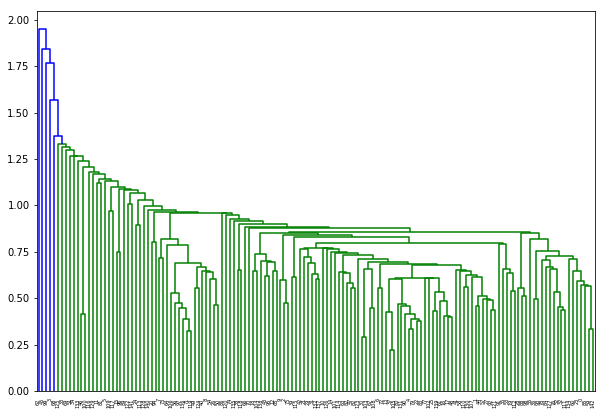

In [125]:
# heirarchical clustering - Single 
plt.figure(figsize=(10,7))
mergings = linkage(country_reduced, method = "single", metric='euclidean')
dendrogram(mergings)
plt.xticks(rotation=90)
plt.show()

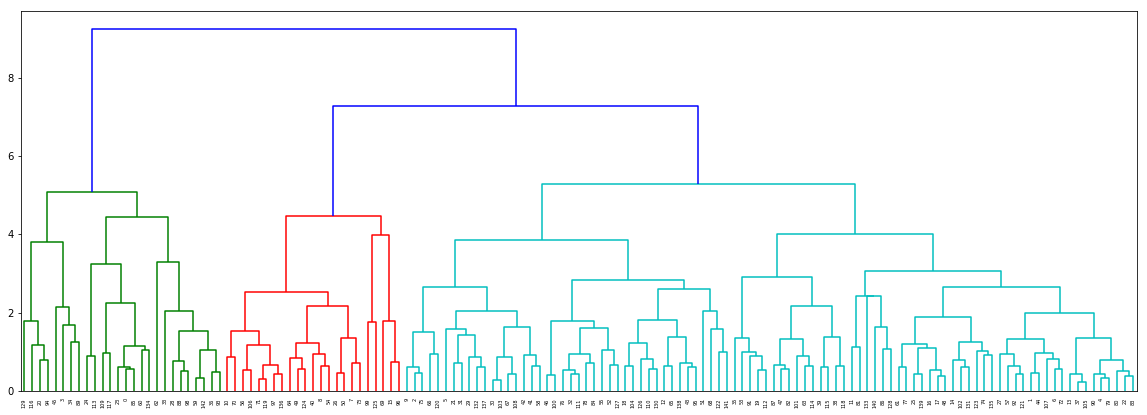

In [126]:
# heirarchical clustering - Complete
plt.figure(figsize=(20,7))
mergings = linkage(country_reduced, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### 5 Clusters

In [147]:
### 5 clusters 
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
countrydata_hc = pd.concat([country_norm_after_outlierremoval_withcountry, clusterCut], axis=1)
countrydata_hc.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp','country','ClusterID']

In [132]:
countrydata_hc.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country,ClusterID
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria,2
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola,3
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda,1


In [133]:
countrydata_hc.shape

(143, 11)

In [134]:
unique, counts = np.unique(countrydata_hc.ClusterID, return_counts=True)
dict(zip(unique, counts))

{0: 18, 1: 52, 2: 42, 3: 8, 4: 23}

In [135]:
# Analyse the cluster result
km_clusters_child_mort_hc = pd.DataFrame(countrydata_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_income_hc = pd.DataFrame(countrydata_hc.groupby(["ClusterID"]).income.mean())
km_clusters_health_hc = pd.DataFrame(countrydata_hc.groupby(["ClusterID"]).health.mean())
km_clusters_gdpp_hc = pd.DataFrame(countrydata_hc.groupby(["ClusterID"]).gdpp.mean())
km_clusters_life_expec_hc =pd.DataFrame(countrydata_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_life_exports_hc =pd.DataFrame(countrydata_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_life_imports_hc =pd.DataFrame(countrydata_hc.groupby(["ClusterID"]).imports.mean())
km_clusters_life_inflation_hc =pd.DataFrame(countrydata_hc.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_fertility_hc =pd.DataFrame(countrydata_hc.groupby(["ClusterID"]).total_fer.mean())

In [136]:
df_hc = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort_hc, km_clusters_income_hc, km_clusters_health_hc,km_clusters_gdpp_hc,km_clusters_life_expec_hc,km_clusters_life_exports_hc,km_clusters_life_imports_hc,km_clusters_life_inflation_hc,km_clusters_life_fertility_hc], axis=1)
df_hc.columns = ["ClusterID", "child_mort_mean", "Income_mean", "health_mean","gdpp_mean",'life_expec_mean','exports_mean','imports_mean','inflation_mean','fertility_mean']
df_hc.head()

,ClusterID,child_mort_mean,Income_mean,health_mean,gdpp_mean,life_expec_mean,exports_mean,imports_mean,inflation_mean,fertility_mean
0,0,1.812573,-0.784674,0.217013,-0.655028,-1.714332,-0.613985,-0.308710,0.121227,1.684607
1,1,-0.544545,-0.139470,-0.095261,-0.255737,0.389114,0.322720,0.426658,-0.344176,-0.614063
2,2,0.077311,-0.448432,-0.513374,-0.486323,-0.094360,-0.556262,-0.646399,0.269030,0.186864
3,3,0.970079,-0.418162,-0.412871,-0.450272,-1.110154,0.621703,0.482031,0.535099,1.102019
4,4,-0.837938,1.142979,1.191328,1.727412,1.141664,0.022103,-0.307799,-0.618374,-0.755404


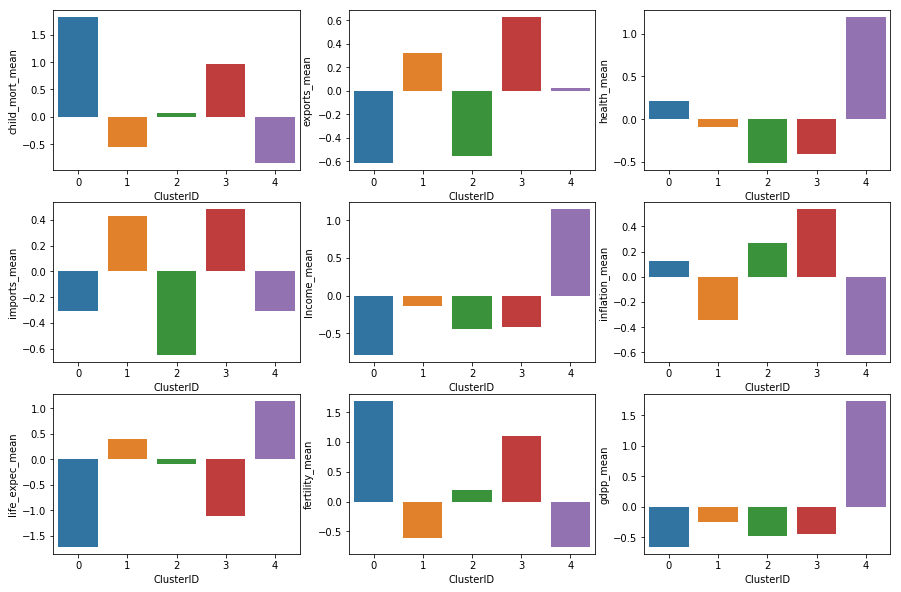

In [137]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.barplot(x=df_hc.ClusterID, y=df_hc['child_mort_mean'])
plt.subplot(3,3,2)
sns.barplot(x=df_hc.ClusterID, y=df_hc['exports_mean'])
plt.subplot(3,3,3)
sns.barplot(x=df_hc.ClusterID, y=df_hc['health_mean'])
plt.subplot(3,3,4)
sns.barplot(x=df_hc.ClusterID, y=df_hc['imports_mean'])
plt.subplot(3,3,5)
sns.barplot(x=df_hc.ClusterID, y=df_hc['Income_mean'])
plt.subplot(3,3,6)
sns.barplot(x=df_hc.ClusterID, y=df_hc['inflation_mean'])
plt.subplot(3,3,7)
sns.barplot(x=df_hc.ClusterID, y=df_hc['life_expec_mean'])
plt.subplot(3,3,8)
sns.barplot(x=df_hc.ClusterID, y=df_hc['fertility_mean'])
plt.subplot(3,3,9)
sns.barplot(x=df_hc.ClusterID, y=df_hc['gdpp_mean'])
plt.show()

Cluster 0 & 3 have very poort life expectancy and high child mortality rate. 
Also poor GDPP

### 6 Clusters

In [140]:
### 6 clusters 
clusterCut6 = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
countrydata_hc_6 = pd.concat([country_norm_after_outlierremoval_withcountry, clusterCut6], axis=1)
countrydata_hc_6.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp','country','ClusterID']

In [141]:
unique, counts = np.unique(countrydata_hc_6.ClusterID, return_counts=True)
dict(zip(unique, counts))

{0: 18, 1: 52, 2: 42, 3: 8, 4: 18, 5: 5}

In [142]:
# analysis of clusters formed.
km_clusters_child_mort_hc6 = pd.DataFrame(countrydata_hc_6.groupby(["ClusterID"]).child_mort.mean())
km_clusters_income_hc6 = pd.DataFrame(countrydata_hc_6.groupby(["ClusterID"]).income.mean())
km_clusters_health_hc6 = pd.DataFrame(countrydata_hc_6.groupby(["ClusterID"]).health.mean())
km_clusters_gdpp_hc6 = pd.DataFrame(countrydata_hc_6.groupby(["ClusterID"]).gdpp.mean())
km_clusters_life_expec_hc6 =pd.DataFrame(countrydata_hc_6.groupby(["ClusterID"]).life_expec.mean())
km_clusters_life_exports_hc6 =pd.DataFrame(countrydata_hc_6.groupby(["ClusterID"]).exports.mean())
km_clusters_life_imports_hc6 =pd.DataFrame(countrydata_hc_6.groupby(["ClusterID"]).imports.mean())
km_clusters_life_inflation_hc6 =pd.DataFrame(countrydata_hc_6.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_fertility_hc6 =pd.DataFrame(countrydata_hc_6.groupby(["ClusterID"]).total_fer.mean())

In [144]:
df_hc6 = pd.concat([pd.Series([0,1,2,3,4,5]), km_clusters_child_mort_hc6, km_clusters_income_hc6, km_clusters_health_hc6,km_clusters_gdpp_hc6,km_clusters_life_expec_hc6,km_clusters_life_exports_hc6,km_clusters_life_imports_hc6,km_clusters_life_inflation_hc6,km_clusters_life_fertility_hc6], axis=1)
df_hc6.columns = ["ClusterID", "child_mort_mean", "Income_mean", "health_mean","gdpp_mean",'life_expec_mean','exports_mean','imports_mean','inflation_mean','fertility_mean']
v.head()

,ClusterID,child_mort_mean,Income_mean,health_mean,gdpp_mean,life_expec_mean,exports_mean,imports_mean,inflation_mean,fertility_mean
0,0,1.812573,-0.784674,0.217013,-0.655028,-1.714332,-0.613985,-0.308710,0.121227,1.684607
1,1,-0.544545,-0.139470,-0.095261,-0.255737,0.389114,0.322720,0.426658,-0.344176,-0.614063
2,2,0.077311,-0.448432,-0.513374,-0.486323,-0.094360,-0.556262,-0.646399,0.269030,0.186864
3,3,0.970079,-0.418162,-0.412871,-0.450272,-1.110154,0.621703,0.482031,0.535099,1.102019
4,4,-0.835186,0.985348,1.143074,1.474627,1.135971,-0.275770,-0.559362,-0.615481,-0.760221


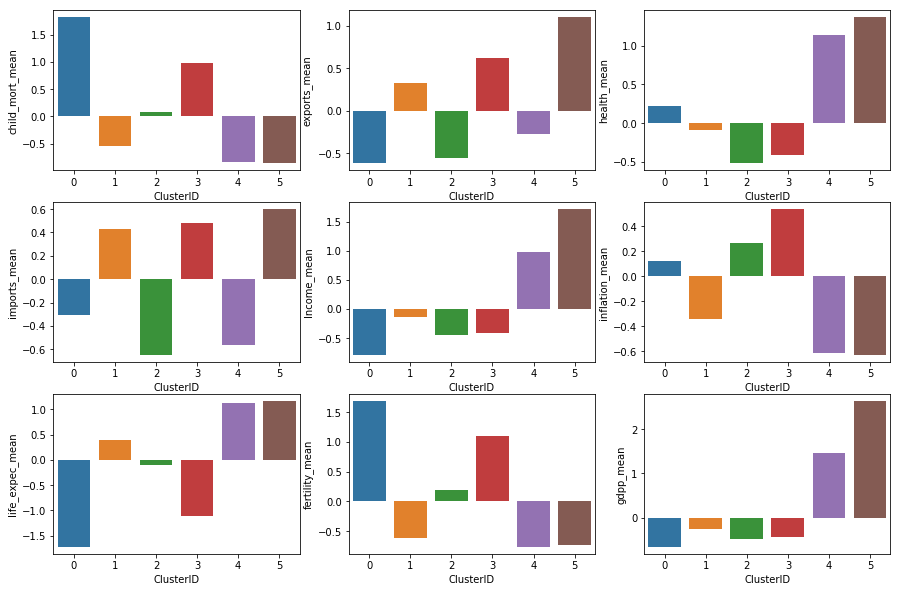

In [145]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.barplot(x=df_hc6.ClusterID, y=df_hc6['child_mort_mean'])
plt.subplot(3,3,2)
sns.barplot(x=df_hc6.ClusterID, y=df_hc6['exports_mean'])
plt.subplot(3,3,3)
sns.barplot(x=df_hc6.ClusterID, y=df_hc6['health_mean'])
plt.subplot(3,3,4)
sns.barplot(x=df_hc6.ClusterID, y=df_hc6['imports_mean'])
plt.subplot(3,3,5)
sns.barplot(x=df_hc6.ClusterID, y=df_hc6['Income_mean'])
plt.subplot(3,3,6)
sns.barplot(x=df_hc6.ClusterID, y=df_hc6['inflation_mean'])
plt.subplot(3,3,7)
sns.barplot(x=df_hc6.ClusterID, y=df_hc6['life_expec_mean'])
plt.subplot(3,3,8)
sns.barplot(x=df_hc6.ClusterID, y=df_hc6['fertility_mean'])
plt.subplot(3,3,9)
sns.barplot(x=df_hc6.ClusterID, y=df_hc6['gdpp_mean'])
plt.show()

Cluster 0 & 3 have very poort life expectancy and high child mortality rate. 
Also poor GDPP

#### Analysis within Cluster ( Cluster =5)

In [148]:
## Countries belonging to Cluster #0 

cl0_country=countrydata_hc.loc[(countrydata_hc.ClusterID==0)]
mean_cl0_life_expec=cl0_country.life_expec.mean()
mean_cl0_child_mort=cl0_country.child_mort.mean()
cl0_country.country.unique()

array(['Afghanistan', 'Burkina Faso', 'Burundi', 'Chad',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda',
       'Sierra Leone', 'South Africa', 'Uganda', 'Zambia'], dtype=object)

In [158]:
## Countries belonging to Cluster 3
cl3_country=countrydata_hc.loc[(countrydata_hc.ClusterID==3)]
mean_cl3_life_expec=cl3_country.life_expec.mean()
mean_cl3_child_mort=cl3_country.child_mort.mean()
cl3_country.country.unique()

array(['Angola', 'Botswana', 'Congo, Rep.', 'Equatorial Guinea',
       'Mauritania', 'Namibia', 'Solomon Islands', 'Togo'], dtype=object)

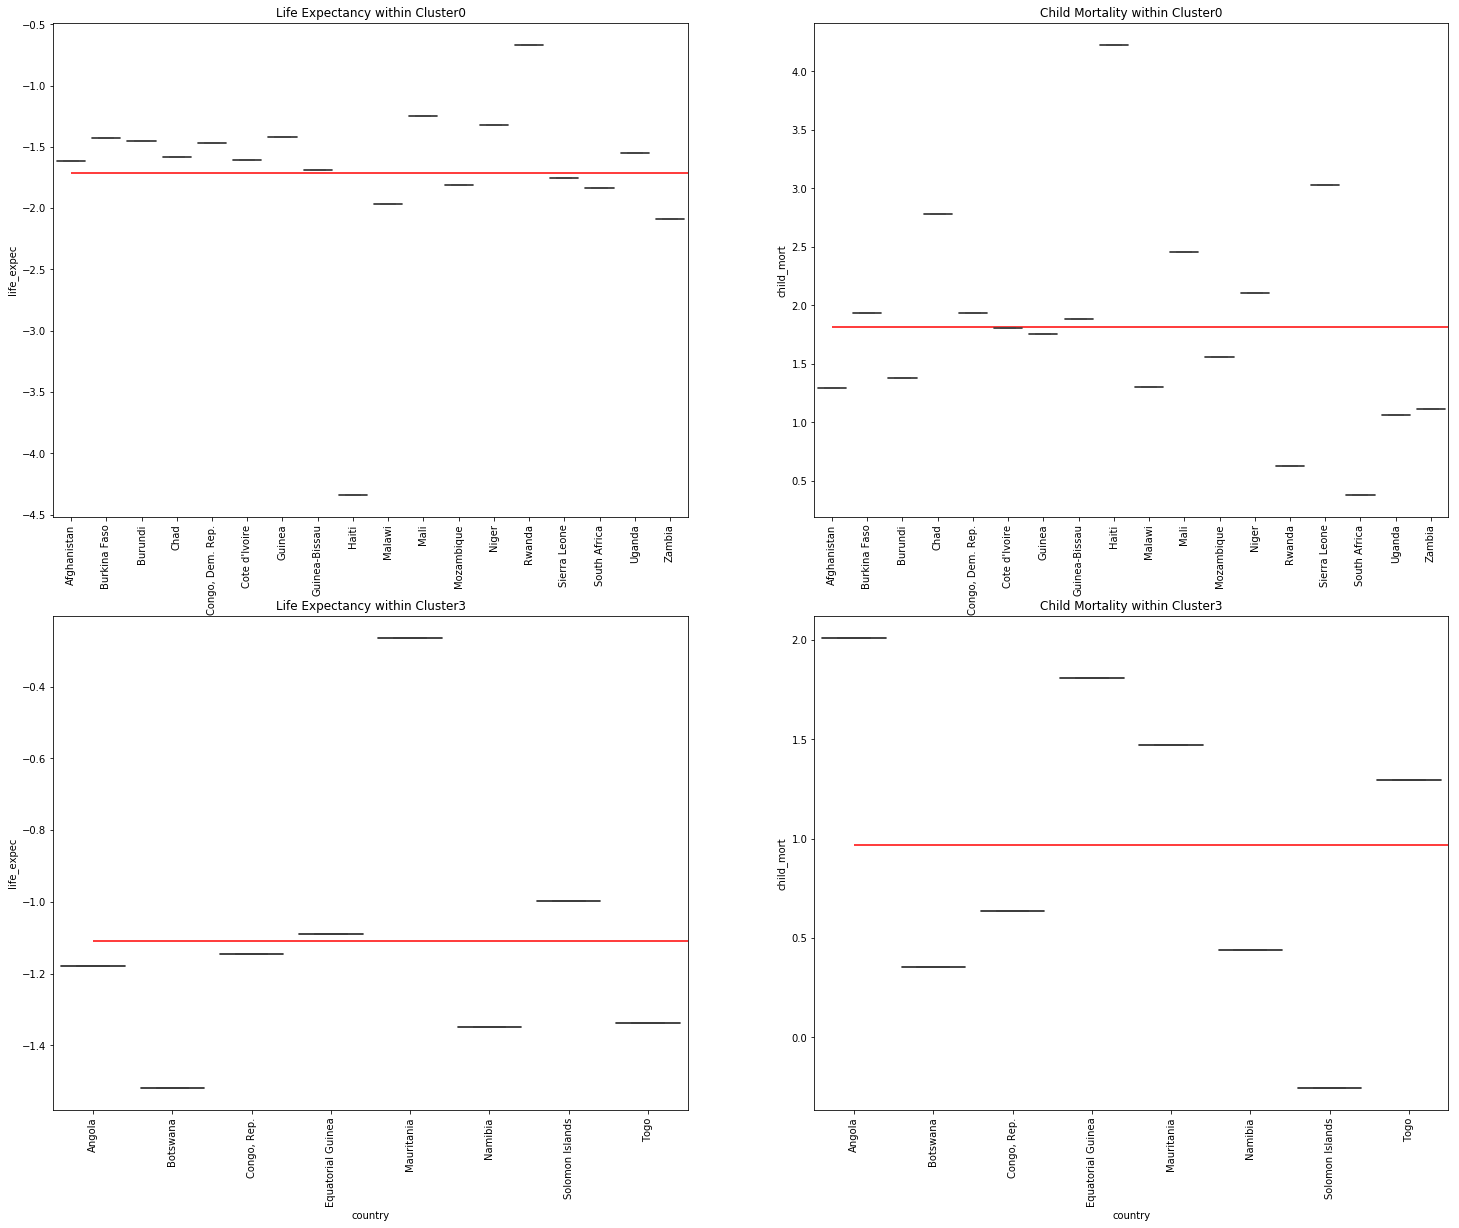

In [159]:
### analysis of Cluster 0 & 3 for life expectancy & Child Mortality - Top variable 

plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.boxplot(x='country', y='life_expec', data=cl0_country )
plt.hlines(mean_cl0_life_expec, 0,len(cl0_country.country.unique()),color='red', linestyle='-')
plt.title("Life Expectancy within Cluster0")
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.boxplot(x='country', y='child_mort', data=cl0_country )
plt.hlines(mean_cl0_child_mort, 0,len(cl0_country.country.unique()),color='red', linestyle='-')
plt.title("Child Mortality within Cluster0")
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.boxplot(x='country', y='life_expec', data=cl3_country )
plt.hlines(mean_cl3_life_expec, 0,len(cl3_country_6.country.unique()),color='red', linestyle='-')
plt.title("Life Expectancy within Cluster3")
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.boxplot(x='country', y='child_mort', data=cl3_country )
plt.hlines(mean_cl3_child_mort, 0,len(cl3_country_6.country.unique()),color='red', linestyle='-')
plt.title("Child Mortality within Cluster3")
plt.xticks(rotation=90)
plt.show()

## Countries which are below the mean for life expectancy  - Cluster 0 
# Haiti, Malawi, Mozambique, Sierra Leone, South Africa, Zambia

## Countries which are below the mean for Child mortality  - Cluster 0
# Afghanistan, Burundi, Guinea, Malawi, Mozambique, Rwanda, South Africa,, Uganda, Zambia

## Countries which are below the mean for life expectancy - Clusetr 3 
# Angola, Bostwana, Congo, Namibia, Togo

## Countries which are below the mean for Child mortality  - Cluster 3
# Bostwana, Congo, Namibia, Solomon Islands

#### Anbalysis within cluster ( Cluster=6)

In [152]:
## Countries belonging to Cluster #0 

cl0_country_6=countrydata_hc_6.loc[(countrydata_hc_6.ClusterID==0)]
mean_cl0_life_expec_6=cl0_country_6.life_expec.mean()
mean_cl0_child_mort_6=cl0_country_6.child_mort.mean()
cl0_country_6.country.unique()

array(['Afghanistan', 'Burkina Faso', 'Burundi', 'Chad',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda',
       'Sierra Leone', 'South Africa', 'Uganda', 'Zambia'], dtype=object)

In [155]:
## Countries belonging to Cluster 3
cl3_country_6=countrydata_hc_6.loc[(countrydata_hc_6.ClusterID==3)]
mean_cl3_life_expec_6=cl3_country_6.life_expec.mean()
mean_cl3_child_mort_6=cl3_country_6.child_mort.mean()
cl3_country_6.country.unique()

array(['Angola', 'Botswana', 'Congo, Rep.', 'Equatorial Guinea',
       'Mauritania', 'Namibia', 'Solomon Islands', 'Togo'], dtype=object)

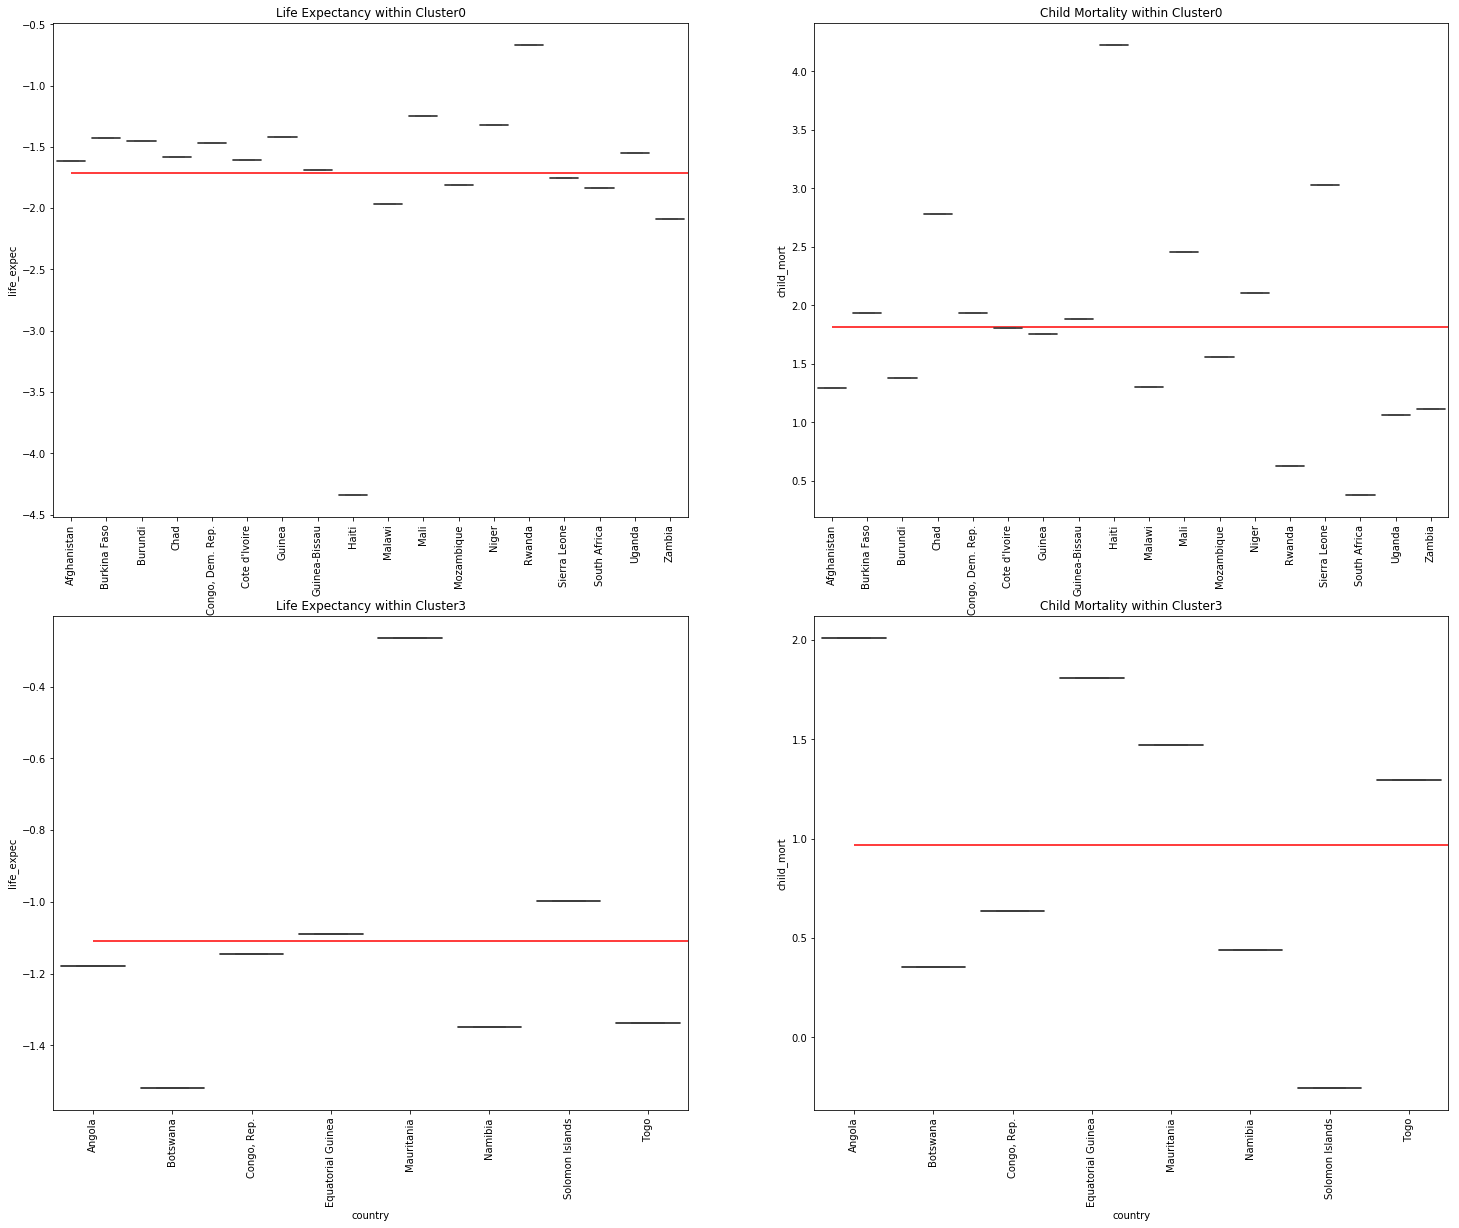

In [157]:
### analysis of Cluster 0 & 3 for life expectancy & Child Mortality - Top variable 

plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.boxplot(x='country', y='life_expec', data=cl0_country_6 )
plt.hlines(mean_cl0_life_expec_6, 0,len(cl0_country_6.country.unique()),color='red', linestyle='-')
plt.title("Life Expectancy within Cluster0")
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.boxplot(x='country', y='child_mort', data=cl0_country_6 )
plt.hlines(mean_cl0_child_mort_6, 0,len(cl0_country_6.country.unique()),color='red', linestyle='-')
plt.title("Child Mortality within Cluster0")
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.boxplot(x='country', y='life_expec', data=cl3_country_6 )
plt.hlines(mean_cl3_life_expec_6, 0,len(cl3_country_6.country.unique()),color='red', linestyle='-')
plt.title("Life Expectancy within Cluster3")
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.boxplot(x='country', y='child_mort', data=cl3_country_6 )
plt.hlines(mean_cl3_child_mort_6, 0,len(cl3_country_6.country.unique()),color='red', linestyle='-')
plt.title("Child Mortality within Cluster3")
plt.xticks(rotation=90)
plt.show()

## Countries which are below the mean for life expectancy  - Cluster 0 
# Haiti, Malawi, Mozambique, Sierra Leone, South Africa, Zambia

## Countries which are below the mean for Child mortality  - Cluster 0
# Afghanistan, Burundi, Guinea, Malawi, Mozambique, Rwanda, South Africa,, Uganda, Zambia

## Countries which are below the mean for life expectancy - Clusetr 3 
# Angola, Bostwana, Congo, Namiia, Togo

## Countries which are below the mean for Child mortality  - Cluster 3
# Bostwana, Congo, Namibia, Solomon Islands

<B>Results of both cluster cut 5 & 6 seem the same for analysis of Top variable.</B>

In [161]:
print("Life Expec - hc6 - Cl0",mean_cl0_life_expec_6)
print("Life Expec - hc6 - Cl3",mean_cl3_life_expec_6)
print("Life Expec - hc5 - Cl0",mean_cl0_life_expec)
print("Life Expec - hc5 - Cl3",mean_cl3_life_expec)

### Lowest mean of Life expectancy is -1.7143318506051353

Life Expec - hc6 - Cl0 -1.7143318506051353
Life Expec - hc6 - Cl3 -1.1101542133151685
Life Expec - hc5 - Cl0 -1.7143318506051353
Life Expec - hc5 - Cl3 -1.1101542133151685


In [160]:
print("Child Mortality - hc5 - Cl0",mean_cl0_child_mort)
print("Child Mortality - hc5 - Cl3",mean_cl3_child_mort)
print("Child Mortality - hc6 - Cl0",mean_cl0_child_mort_6)
print("Child Mortality - hc6 - Cl3",mean_cl3_child_mort_6)

### Highest mean of child mortality is 1.8125729038547658

Child Mortality - hc5 - Cl0 1.8125729038547658
Child Mortality - hc5 - Cl3 0.9700789745625256
Child Mortality - hc6 - Cl0 1.8125729038547658
Child Mortality - hc6 - Cl3 0.9700789745625256


In [162]:
#Countries less than the mean calcualted above for life expectancy 
life_expec_belowmean=country_norm_with_country.loc[(country_norm_with_country.life_expec < -1.7143318506051353)]
life_expec_belowmean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
31,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035,Central African Republic
66,4.221297,-0.944352,0.034438,0.737863,-0.813969,-0.221257,-4.337186,0.253120,-0.673215,Haiti
87,1.527804,-0.062532,1.564416,2.241778,-0.768184,-0.344609,-2.713097,0.233243,-0.645415,Lesotho
94,1.298994,-0.669927,-0.082410,-0.496757,-0.838422,0.409732,-1.968722,1.564979,-0.684324,Malawi
106,1.560136,-0.351593,-0.586317,-0.028596,-0.844249,-0.013458,-1.810825,1.730618,-0.686513,Mozambique
132,3.027505,-0.889467,2.294716,-0.513329,-0.828536,0.893648,-1.754433,1.492098,-0.687607,Sierra Leone
137,0.383753,-0.457704,0.775692,-0.807483,-0.267670,-0.135860,-1.833382,-0.237171,-0.311056,South Africa
166,1.114951,-0.150348,-0.338015,-0.662477,-0.721358,0.590015,-2.092785,1.624609,-0.629546,Zambia


In [163]:
#Countries having higher value than the mean calcualted above 
childmort_abvmean=country_norm_with_country.loc[(country_norm_with_country.child_mort > 1.8125729038547658)]
childmort_abvmean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
25,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976,Burkina Faso
31,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035,Central African Republic
32,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355,Chad
37,1.933196,-0.000328,0.399588,0.112267,-0.860326,1.235237,-1.472473,2.379922,-0.691164,"Congo, Dem. Rep."
64,1.883454,-0.958988,0.615026,-0.484328,-0.819692,-0.456574,-1.686762,1.392715,-0.679508,Guinea-Bissau
66,4.221297,-0.944352,0.034438,0.737863,-0.813969,-0.221257,-4.337186,0.253120,-0.673215,Haiti
97,2.455480,-0.669927,-0.670302,-0.488471,-0.794718,-0.323734,-1.246905,2.386548,-0.670697,Mali
112,2.107290,-0.691881,-0.604575,0.091552,-0.849660,-0.496426,-1.325854,3.009349,-0.690398,Niger
113,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936,Nigeria


In [164]:
set(childmort_abvmean.country) & set(life_expec_belowmean.country)

{'Central African Republic', 'Haiti', 'Sierra Leone'}

## Cluster Plots 

### K Means Clustering  

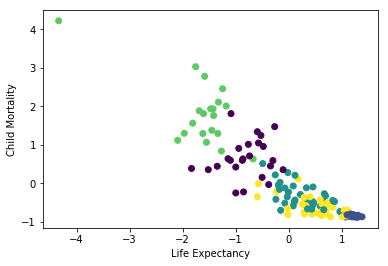

In [168]:
plt.figure('Kmeans with 6 clusters')
plt.scatter(pca_km_6['life_expec'], pca_km_6['child_mort'], c=pca_km_6.ClusterID)
plt.xlabel("Life Expectancy")
plt.ylabel("Child Mortality")
plt.show()

### Hierarchical Cluserting

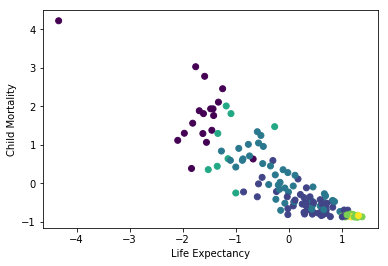

In [170]:
plt.figure('HC with 6 clusters')
plt.scatter(countrydata_hc_6['life_expec'], countrydata_hc_6['child_mort'], c=countrydata_hc_6.ClusterID)
plt.xlabel("Life Expectancy")
plt.ylabel("Child Mortality")
plt.show()

### Clustering based on PCA

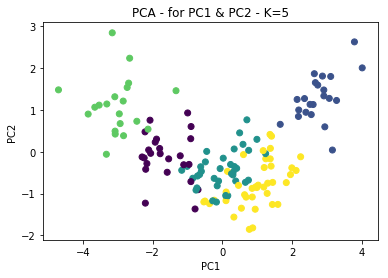

In [173]:
plt.figure('PCA - for PC1 & PC2')
plt.scatter(pca_km['PC1'], pca_km['PC2'], c=pca_km.ClusterID)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title ("PCA - for PC1 & PC2 - K=5")
plt.show()

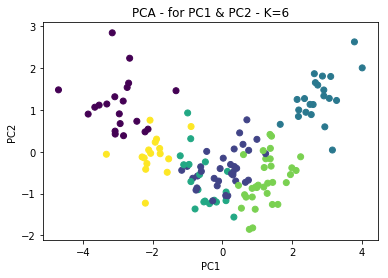

In [174]:
plt.figure('PCA - for PC1 & PC2')
plt.scatter(pca_km_6['PC1'], pca_km_6['PC2'], c=pca_km_6.ClusterID)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title ("PCA - for PC1 & PC2 - K=6")
plt.show()

<B>Summary :</B> 

Child Mortality and Life expectancy are coming out as 2 top influcencing variables.
They are also related.

By both clustering mehtods, KMeans and HC, below countries emerge as top countries which will require investment.


1. 'Central African Republic'
2. 'Haiti', 
3. 'Sierra Leone'
4. 'Guinea-Bissau' 
